# PCA DeepDive

![](2.gif)

In [112]:
import os, sys, numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

## Create Toy Data

In [153]:
ndim = 2
mu = np.array([10] * ndim) # Mean
sigma = np.zeros((ndim, ndim)) - 1.8 # Covariance
np.fill_diagonal(sigma, 3.5) 
print("Mu ", mu)
print("Sigma ", sigma)

# Create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)

Mu  [10 10]
Sigma  [[ 3.5 -1.8]
 [-1.8  3.5]]
Data shape  (1000, 2)


## Standartization

In [154]:
!pip install latexify-py==0.2.0

In [155]:
import latexify


In [156]:
@latexify.function
def standartize(data):
    return (data-np.mean(data, axis=0)) 
standartize

In [157]:
stand_data = standartize(org_data)

## Covariance matrix

In [158]:
@latexify.function
def covmat(data):
    return np.cov(data.T)

cov = covmat(stand_data)
covmat

In [159]:
cov

array([[ 3.54830209, -1.79795497],
       [-1.79795497,  3.60288669]])

## Computating eigen vectors

In [160]:
def eigen(cov):
    return np.linalg.eig(cov)
eig_val, eig_vec = eigen(cov)

print("Eigen vectors ", eig_vec)
print("Eigen values ", eig_val)

Eigen vectors  [[-0.71245277  0.70172007]
 [-0.70172007 -0.71245277]]
Eigen values  [1.77743229 5.37375649]


In [161]:
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Sorted Eigen vectors ", eig_vec)
print("Sorted Eigen values ", eig_val, "\n")

Sorted Eigen vectors  [[ 0.70172007 -0.71245277]
 [-0.71245277 -0.70172007]]
Sorted Eigen values  [5.37375649 1.77743229] 



In [162]:
np.dot(eig_vec[0],eig_vec[1])


6.238912692558854e-18

In [163]:
eig_vec[0][0]

0.7017200698640568

In [164]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs=stand_data[..., 0], ys=stand_data[..., 1], zs=stand_data[..., 2], zdir='z', s=10, c='g', depthshade=True)
# ax.plot(xs=[0,eig_vec[0][0]*10], ys=[0,eig_vec[0][1]*10], zs=[0,eig_vec[0][2]*10], label= 'PC1')
# ax.plot(xs=[0,eig_vec[1][0]*10], ys=[0,eig_vec[1][1]*10], zs=[0,eig_vec[1][2]*10], label= 'PC2')
# ax.plot(xs=[0,eig_vec[2][0]*10], ys=[0,eig_vec[2][1]*10], zs=[0,eig_vec[2][2]*10], label= 'PC3')
# plt.legend()

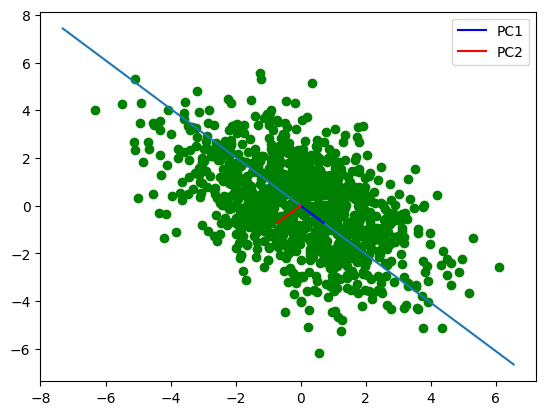

In [165]:
# Since we have created an eigenvector with the desired direction, we can generate a fuction with that solope
# Direction of the eigenvector with largest 
x = np.linspace(min(stand_data[..., 0])-1,max(stand_data[..., 1])+1,1000)

# Y =mx where m has the direction of the eigenvector
y = eig_vec[0][1]/eig_vec[0][0]*x


plt.scatter(stand_data[..., 0],stand_data[..., 1], c='g')
plt.plot(x,y)
# Principal component 1 direction
plt.plot([0,eig_vec[0][0]], [0,eig_vec[0][1]], c='b', label = 'PC1')

# Principal component 2 direction
plt.plot([0,eig_vec[1][0]], [0,eig_vec[1][1]], c='r', label= 'PC2')
plt.legend()
plt.show()

Explained variance  [0.7514494 0.2485506]
Cumulative variance  [0.7514494 1.       ]


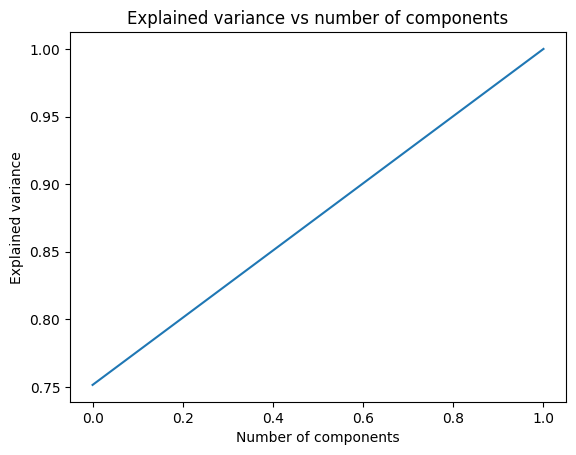

(2, 2)


In [166]:
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
print("Explained variance ", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance ", cumulative_variance)

# Plot explained variance
plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance)
plt.title("Explained variance vs number of components")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

## We will 2 components
n_comp = 2
eig_vec = eig_vec[:,:n_comp]
print(eig_vec.shape)


In [167]:
pca_data = stand_data.dot(eig_vec)
print("Transformed data ", pca_data.shape)

Transformed data  (1000, 2)


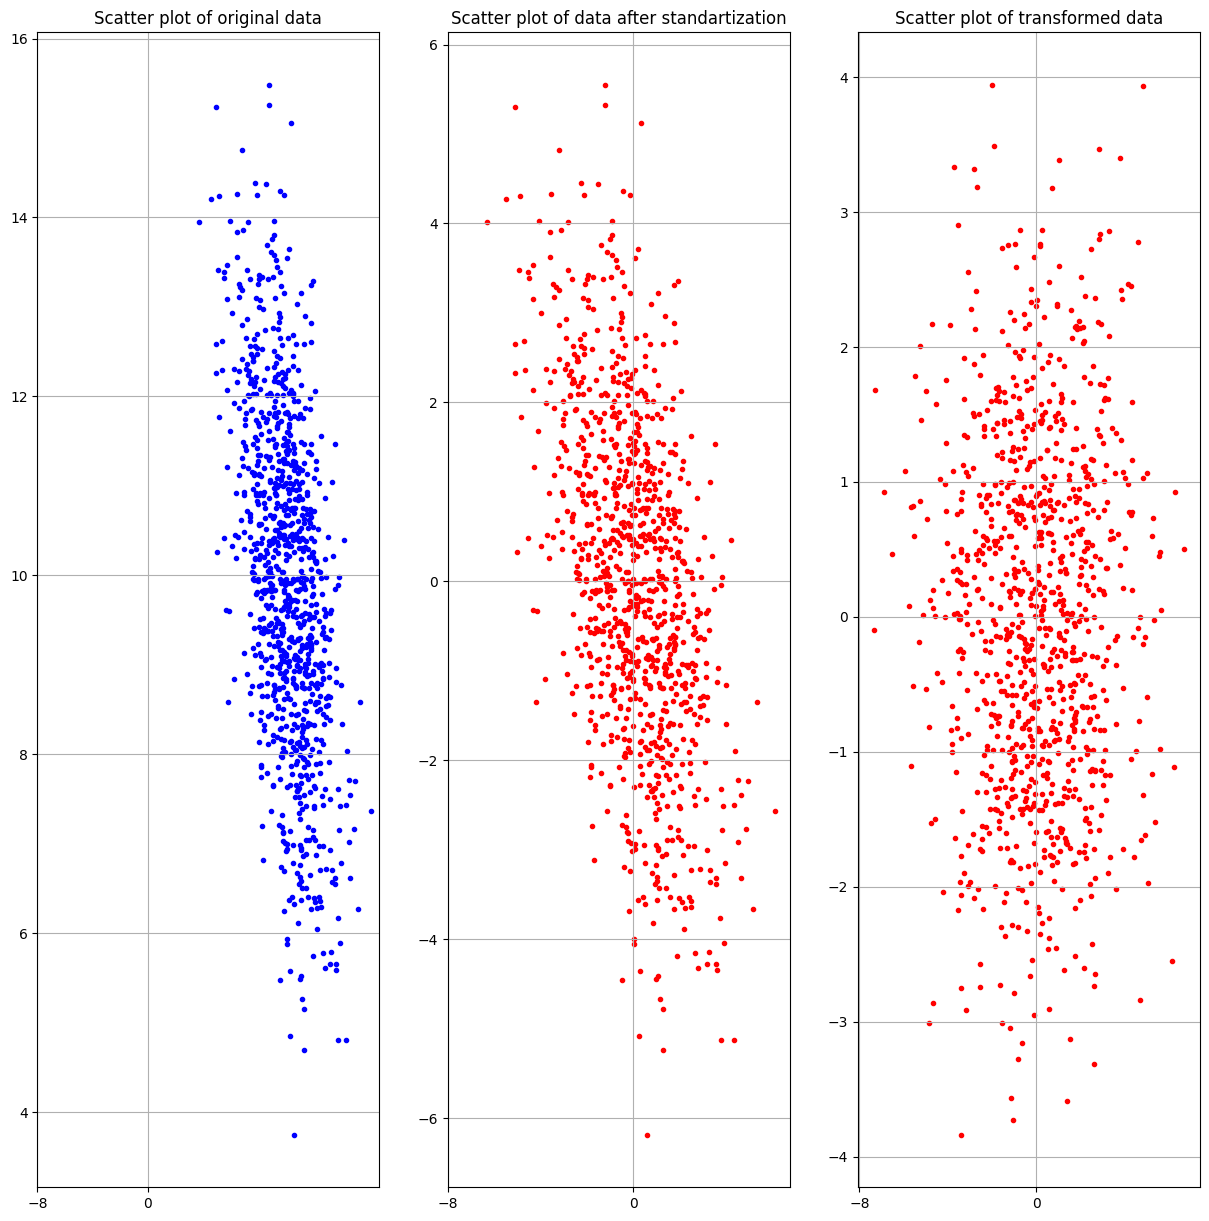

In [168]:
fig, ax = plt.subplots(1,3, figsize= (15,15))
# Plot original data
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')

# Plot data after subtracting mean from data
ax[1].scatter(stand_data[:,0], stand_data[:,1], color='red', marker='.')

# Plot data after subtracting mean from data
ax[2].scatter(pca_data[:,0], pca_data[:,1], color='red', marker='.')

# Set title
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after standartization")
ax[2].set_title("Scatter plot of transformed data")

# Set x ticks
ax[0].set_xticks(np.arange(-8, 1, 8))
ax[1].set_xticks(np.arange(-8, 1, 8))
ax[2].set_xticks(np.arange(-8, 1, 8))

# Set grid to 'on'
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')

major_axis = eig_vec[:,0].flatten()
xmin = np.amin(pca_data[:,0])
xmax = np.amax(pca_data[:,0])
ymin = np.amin(pca_data[:,1])
ymax = np.amax(pca_data[:,1])

plt.show()
plt.close('all')


In [169]:
recon_data = (pca_data.dot(eig_vec.T) + np.mean(org_data, axis=0)) * np.std(org_data, axis=0)
print(recon_data.shape)

(1000, 2)


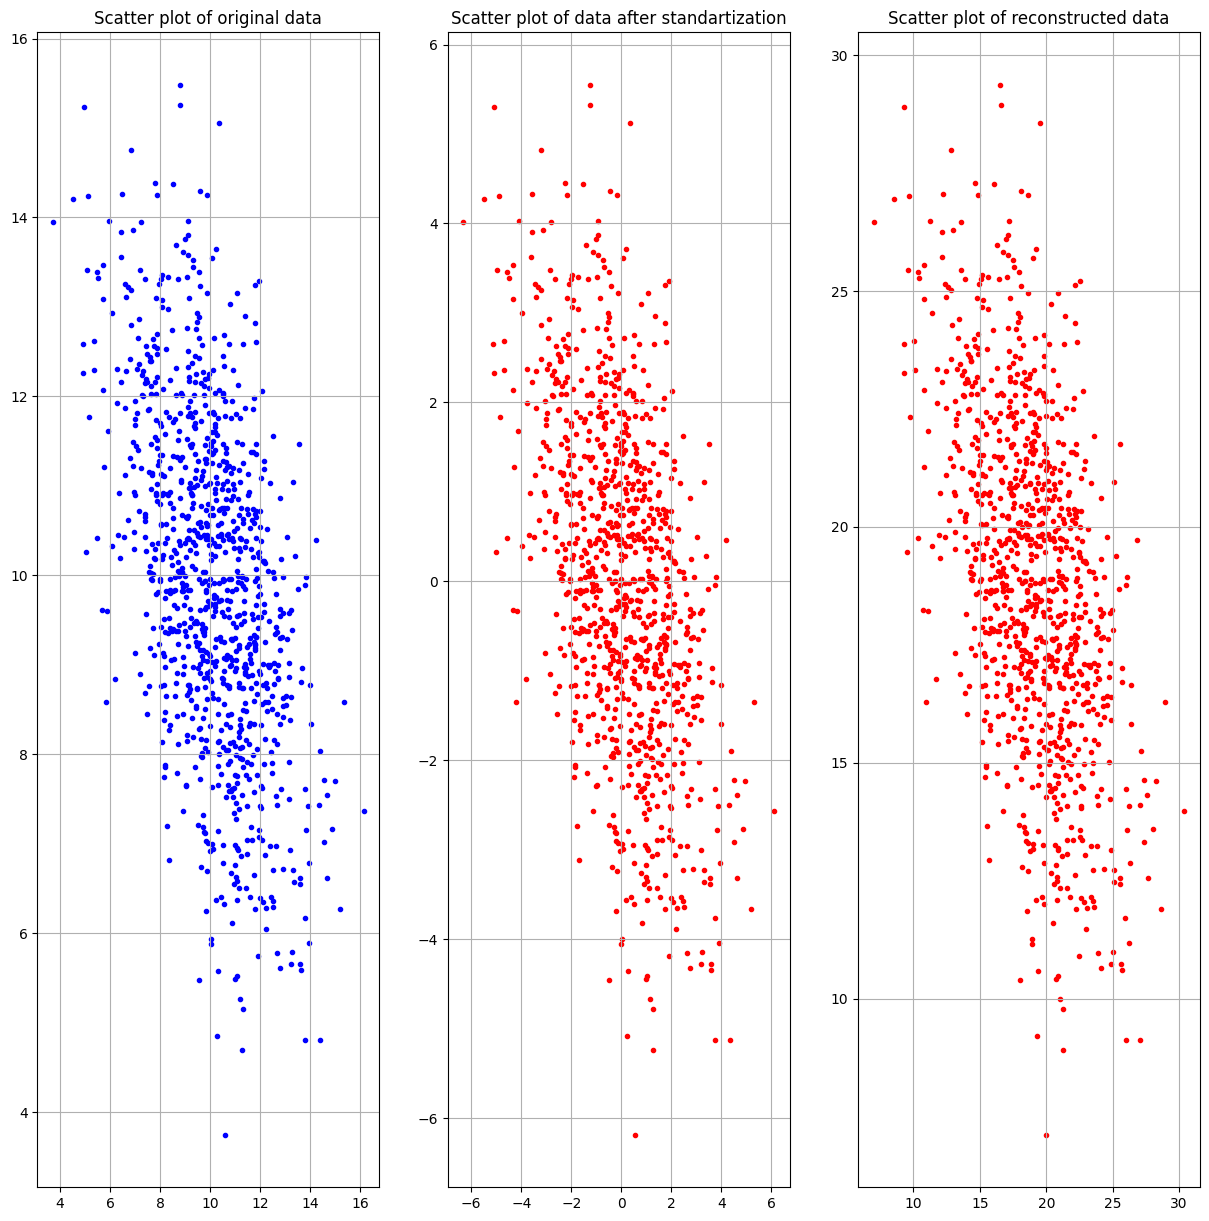

In [170]:
fig, ax = plt.subplots(1,3, figsize= (15, 15))
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')
ax[1].scatter(stand_data[:,0], stand_data[:,1], color='red', marker='.')
ax[2].scatter(recon_data[:,0], recon_data[:,1], color='red', marker='.')
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after standartization")
ax[2].set_title("Scatter plot of reconstructed data")
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')
plt.show()


In [171]:
loss = np.mean(np.square(recon_data - org_data))
print("Reconstruction loss ", loss)


Reconstruction loss  81.77368589834408


## Relations between PCA and SVD

![](1_6wkgGgBy2NLVmRVOw8K86w.png)

![](1.png)

In [172]:
def pca(X):
  # Data matrix X, assumes 0-centered
  n, m = X.shape
  assert np.allclose(X.mean(axis=0), np.zeros(m))
  # Compute covariance matrix
  C = np.dot(X.T, X) / (n-1)
  # Eigen decomposition
  eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Project X onto PC space
  X_pca = np.dot(X, eigen_vecs)
  return X_pca

In [173]:
def svd(X):
  # Data matrix X, X doesn't need to be 0-centered
  n, m = X.shape
  # Compute full SVD
  U, Sigma, Vh = np.linalg.svd(X, 
      full_matrices=False, # It's not necessary to compute the full matrix of U or V
      compute_uv=True)
  # Transform X with SVD components
  X_svd = np.dot(U, np.diag(Sigma))
  return X_svd

In [174]:
ndim = 3
mu = np.array([10] * ndim) # Mean
sigma = np.zeros((ndim, ndim)) - 1.8 # Covariance
np.fill_diagonal(sigma, 3.5) 
print("Mu ", mu)
print("Sigma ", sigma)

# Create 1000 samples using mean and sigma
X = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)

X = standartize(X)

Mu  [10 10 10]
Sigma  [[ 3.5 -1.8 -1.8]
 [-1.8  3.5 -1.8]
 [-1.8 -1.8  3.5]]
Data shape  (1000, 2)


/var/folders/5d/rvg0ggg12076hgrtj0r8t0200000gn/T/ipykernel_13796/2493483579.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  X = rnd.multivariate_normal(mu, sigma, size=(1000))


In [175]:
# Compute covariance matrix
C = np.dot(X.T, X) / (ndim-1)
# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(C)

# SVD
U, Sigma, Vh = np.linalg.svd(X, 
    full_matrices=False, 
    compute_uv=True)
# Relationship between singular values and eigen values:
print(np.allclose(np.square(Sigma) / (ndim - 1), np.flip(np.sort(eigen_vals)))) # True


True


# Seminar

In [ ]:
!pip install -U scikit-learn scipy matplotlib
# !pip install umap
# !pip uninstall umap -y
!pip install umap-learn


Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Successfully uninstalled umap-0.1.1
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached numba-0.56.4-cp38-cp38-macosx_11_0_arm64.whl (2.4 MB)
  Using cached pynndescent-0.5.8.tar.gz (1.1 MB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 622.5 kB/s eta 0:00:0000:0100:01
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=8e81d6f90f6d2f722112e57ddeaae6124198f2b30d124a36c8257c3f201a28a7
  Stored in directory: /Users/kryzhikov/Library/Caches/pip/wheels/de/b2/e6/f3710dd75722ad40e856825ebdb090021a774e59f07d39bfc6
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55496 sha256=48c6d6384cdf6abf805ffbd6ace3166094c5d8bc50e268742bc7cf555d17a31f
  Stored in directory: /Users/kryzhikov/Library/Caches/pip/wheels/c9/24/e3/9668804f30023bd253f22a9c37befce9d70a1f65

In [ ]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('MNIST original')
import matplotlib.pyplot as plt
import numpy as np
from time import time
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import umap

In [ ]:
data_sources = {
    "training_images": "train-images-idx3-ubyte.gz",  # 60,000 training images.
    "test_images": "t10k-images-idx3-ubyte.gz",  # 10,000 test images.
    "training_labels": "train-labels-idx1-ubyte.gz",  # 60,000 training labels.
    "test_labels": "t10k-labels-idx1-ubyte.gz",  # 10,000 test labels.
}

In [ ]:
headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:10.0) Gecko/20100101 Firefox/10.0"
}
request_opts = {
    "headers": headers,
    "params": {"raw": "true"},
}

In [ ]:
import requests
import os

data_dir = "./_data"
os.makedirs(data_dir, exist_ok=True)

base_url = "https://github.com/rossbar/numpy-tutorial-data-mirror/blob/main/"

for fname in data_sources.values():
    fpath = os.path.join(data_dir, fname)
    if not os.path.exists(fpath):
        print("Downloading file: " + fname)
        resp = requests.get(base_url + fname, stream=True, **request_opts)
        resp.raise_for_status()  # Ensure download was succesful
        with open(fpath, "wb") as fh:
            for chunk in resp.iter_content(chunk_size=128):
                fh.write(chunk)

In [ ]:
import gzip
import numpy as np

mnist_dataset = {}

# Images
for key in ("training_images", "test_images"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(
            mnist_file.read(), np.uint8, offset=16
        ).reshape(-1, 28 * 28)
# Labels
for key in ("training_labels", "test_labels"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(mnist_file.read(), np.uint8, offset=8)

In [ ]:
x_train, y_train, x_test, y_test = (
    mnist_dataset["training_images"][:5000],
    mnist_dataset["training_labels"][:5000],
    mnist_dataset["test_images"][:1000],
    mnist_dataset["test_labels"][:1000],
)

In [ ]:
print(
    "The shape of training images: {} and training labels: {}".format(
        x_train.shape, y_train.shape
    )
)
print(
    "The shape of test images: {} and test labels: {}".format(
        x_test.shape, y_test.shape
    )
)

The shape of training images: (5000, 784) and training labels: (5000,)
The shape of test images: (1000, 784) and test labels: (1000,)


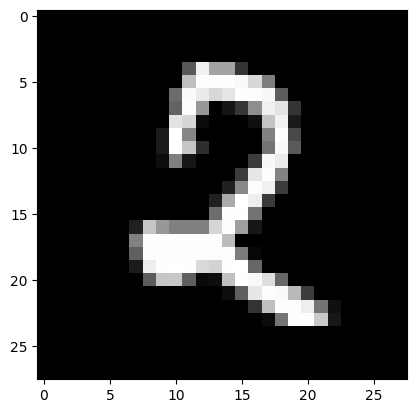

In [ ]:
import matplotlib.pyplot as plt

# Take the 60,000th image (indexed at 59,999) from the training set,
# reshape from (784, ) to (28, 28) to have a valid shape for displaying purposes.
mnist_image = x_train[4999, :].reshape(28, 28)
# Set the color mapping to grayscale to have a black background.
plt.imshow(mnist_image, cmap="gray")
# Display the image.
plt.show()

In [ ]:
x_train = np.reshape(x_train, (len(x_train), -1))/255
x_test = np.reshape(x_test, (len(x_test), -1))/255

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 784) (5000,)
(1000, 784) (1000,)


In [ ]:
steps = [('scaling', StandardScaler()), ('pca', PCA(n_components=0.85))]
pipeline = Pipeline(steps)
pipeline.fit(x_train)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=0.85))])

In [ ]:
reduced = pipeline.inverse_transform(pipeline.transform(x_train))


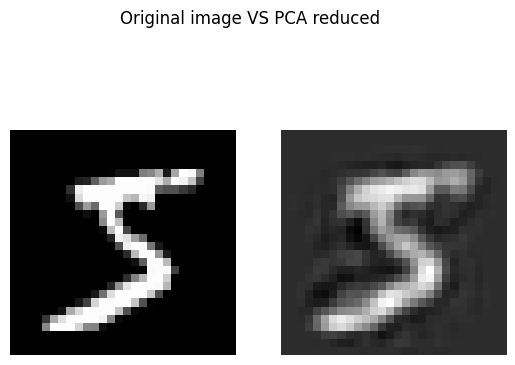

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x_train[0].reshape(28,28), cmap='gray')
ax2.matshow(reduced[0].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[0]))
plt.show()

In [ ]:
steps = [('scaling', StandardScaler()), ('clf', SVC())]

pipeline = Pipeline(steps)

# train
t0 = time()
pipeline.fit(x_train, y_train)

# predict
y_pred = pipeline.predict(x_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# time taken
t_all_feats = time() - t0
print("Training and classification done in {}s".format(t_all_feats))

accuracy: 0.917 

[[ 82   0   0   0   0   1   2   0   0   0]
 [  0 124   0   0   0   0   1   0   1   0]
 [  1   0 106   1   0   0   0   4   4   0]
 [  0   0   2  96   1   3   0   1   3   1]
 [  1   0   1   0 101   0   0   2   0   5]
 [  1   0   0   3   0  79   0   2   0   2]
 [  3   0   2   0   1   1  79   1   0   0]
 [  0   1   3   0   1   0   0  92   0   2]
 [  2   0   2   4   2   0   0   1  77   1]
 [  0   0   0   1   4   0   0   5   3  81]]
Training and classification done in 5.992966890335083s


In [ ]:
# define pipeline steps
steps = [('scaling', StandardScaler()), ('reduce_dim', PCA(n_components=50)), ('clf', SVC())]
pipeline = Pipeline(steps)

# train
t0 = time()
pipeline.fit(x_train, y_train)

# predict
y_pred = pipeline.predict(x_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

t_reduced_feats = time() - t0
print("Training and classification done in {}s".format(t_reduced_feats))
print("Speedup {}x".format(t_all_feats/t_reduced_feats))

accuracy: 0.923 

[[ 82   0   0   0   0   2   1   0   0   0]
 [  0 125   0   0   0   0   1   0   0   0]
 [  2   0 107   0   0   0   0   3   4   0]
 [  0   0   1  96   0   3   0   3   3   1]
 [  1   0   2   0 101   0   0   1   0   5]
 [  1   0   0   2   1  81   0   0   1   1]
 [  3   0   0   0   1   1  82   0   0   0]
 [  0   2   3   1   1   0   0  90   0   2]
 [  2   0   2   5   1   1   0   1  76   1]
 [  0   0   0   0   4   0   0   3   4  83]]
Training and classification done in 3.7980480194091797s
Speedup 1.5779070879855128x


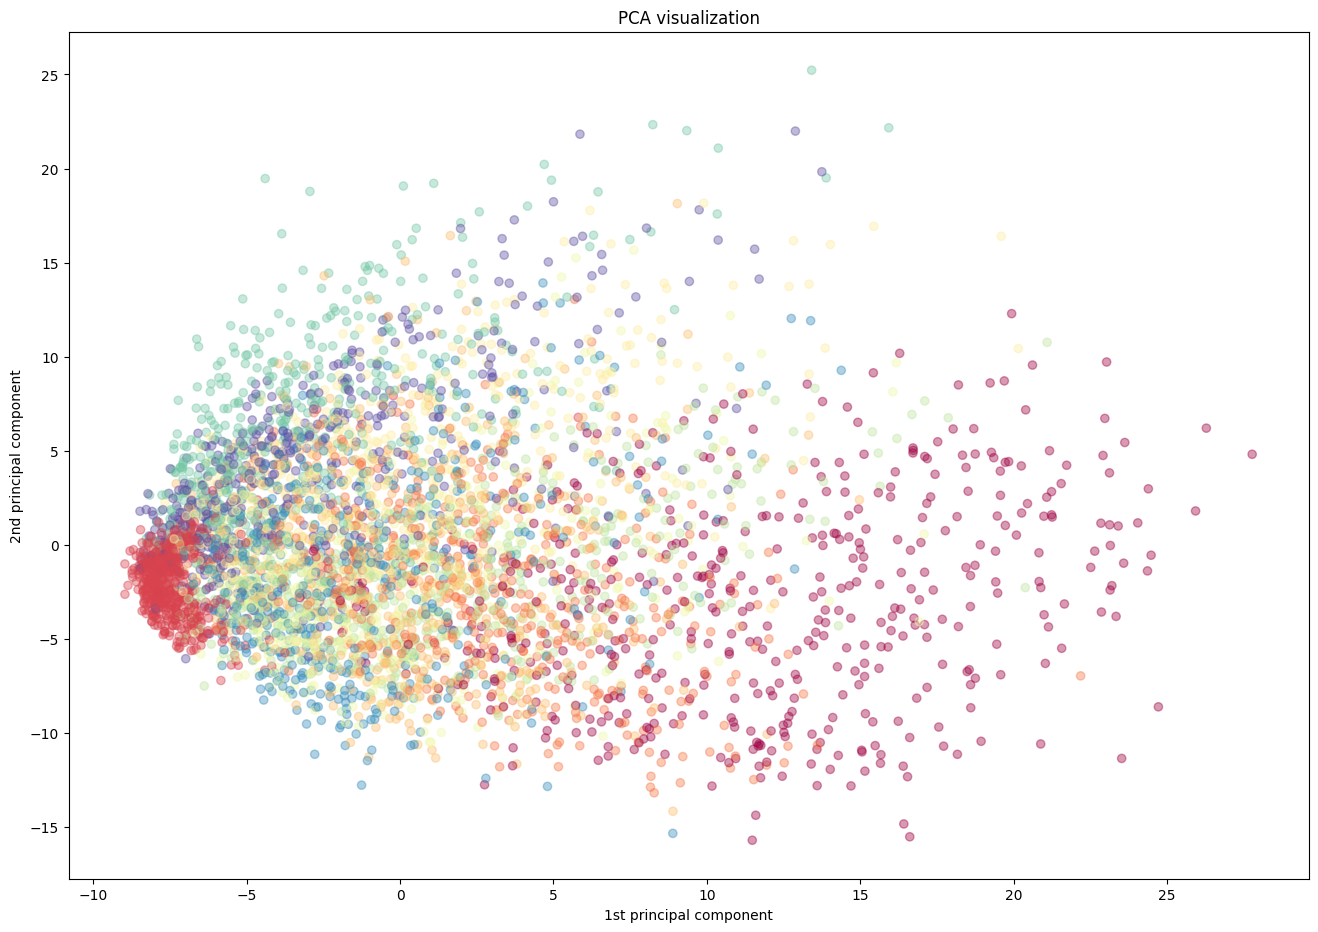

In [ ]:

# define pipeline steps
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('dim_reduction', PCA(n_components=2))
])

pca_results =  pca_pipeline.fit_transform(x_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=pca_results[:,0], 
    y=pca_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

/Users/kryzhikov/miniforge3/envs/finance/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/kryzhikov/miniforge3/envs/finance/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


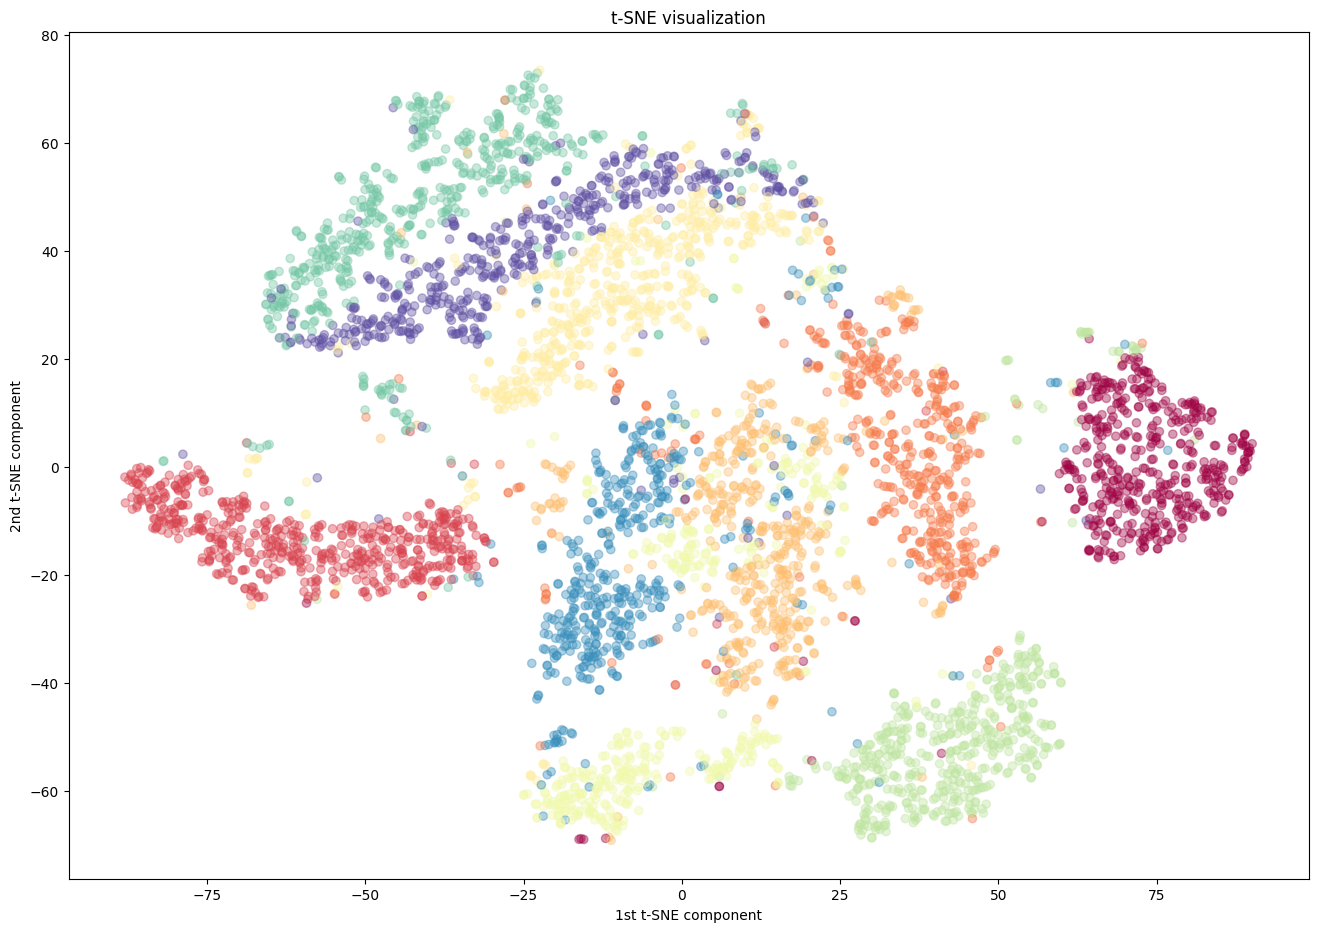

In [ ]:
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    # reduce to 50 PCA components, before t-SNE
    # otherwise, it is gonna take forever to finish…
    ('dim_reduction', PCA(n_components=50)), 
    ('2d_reduction',  TSNE(n_components=2, init='pca', random_state=42))
])

tsne_results =  tsne_pipeline.fit_transform(x_train)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("t-SNE visualization")
plt.xlabel("1st t-SNE component")
plt.ylabel("2nd t-SNE component")
plt.show()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


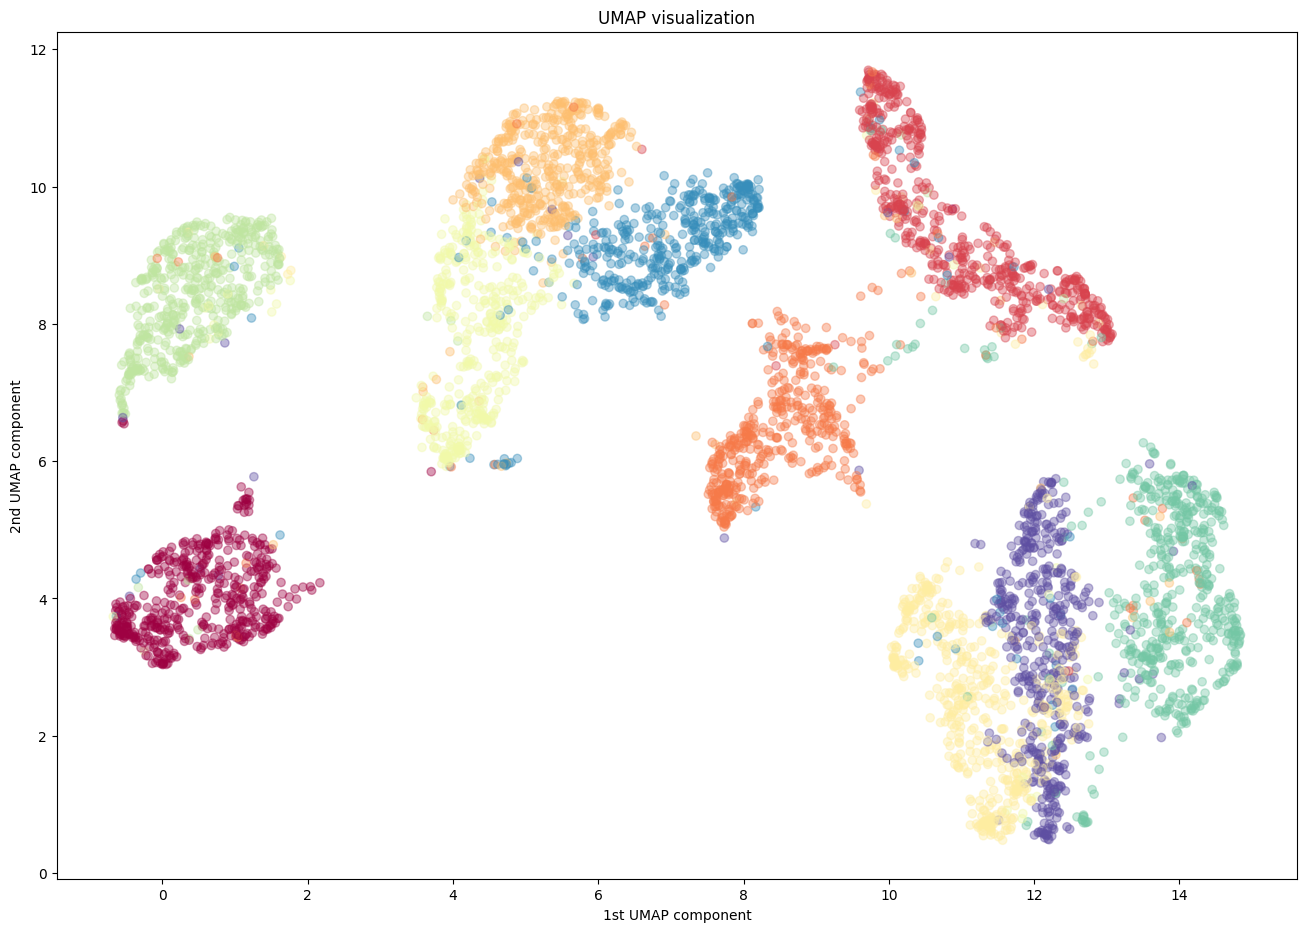

In [ ]:
umap_results =  umap.UMAP(n_components=2, random_state=42).fit_transform(x_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=umap_results[:,0], 
    y=umap_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4
)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("UMAP visualization")
plt.xlabel("1st UMAP component")
plt.ylabel("2nd UMAP component")
plt.show()


## PCA For Features Selection

In [177]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 8.0 MB/s eta 0:00:00


In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [202]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

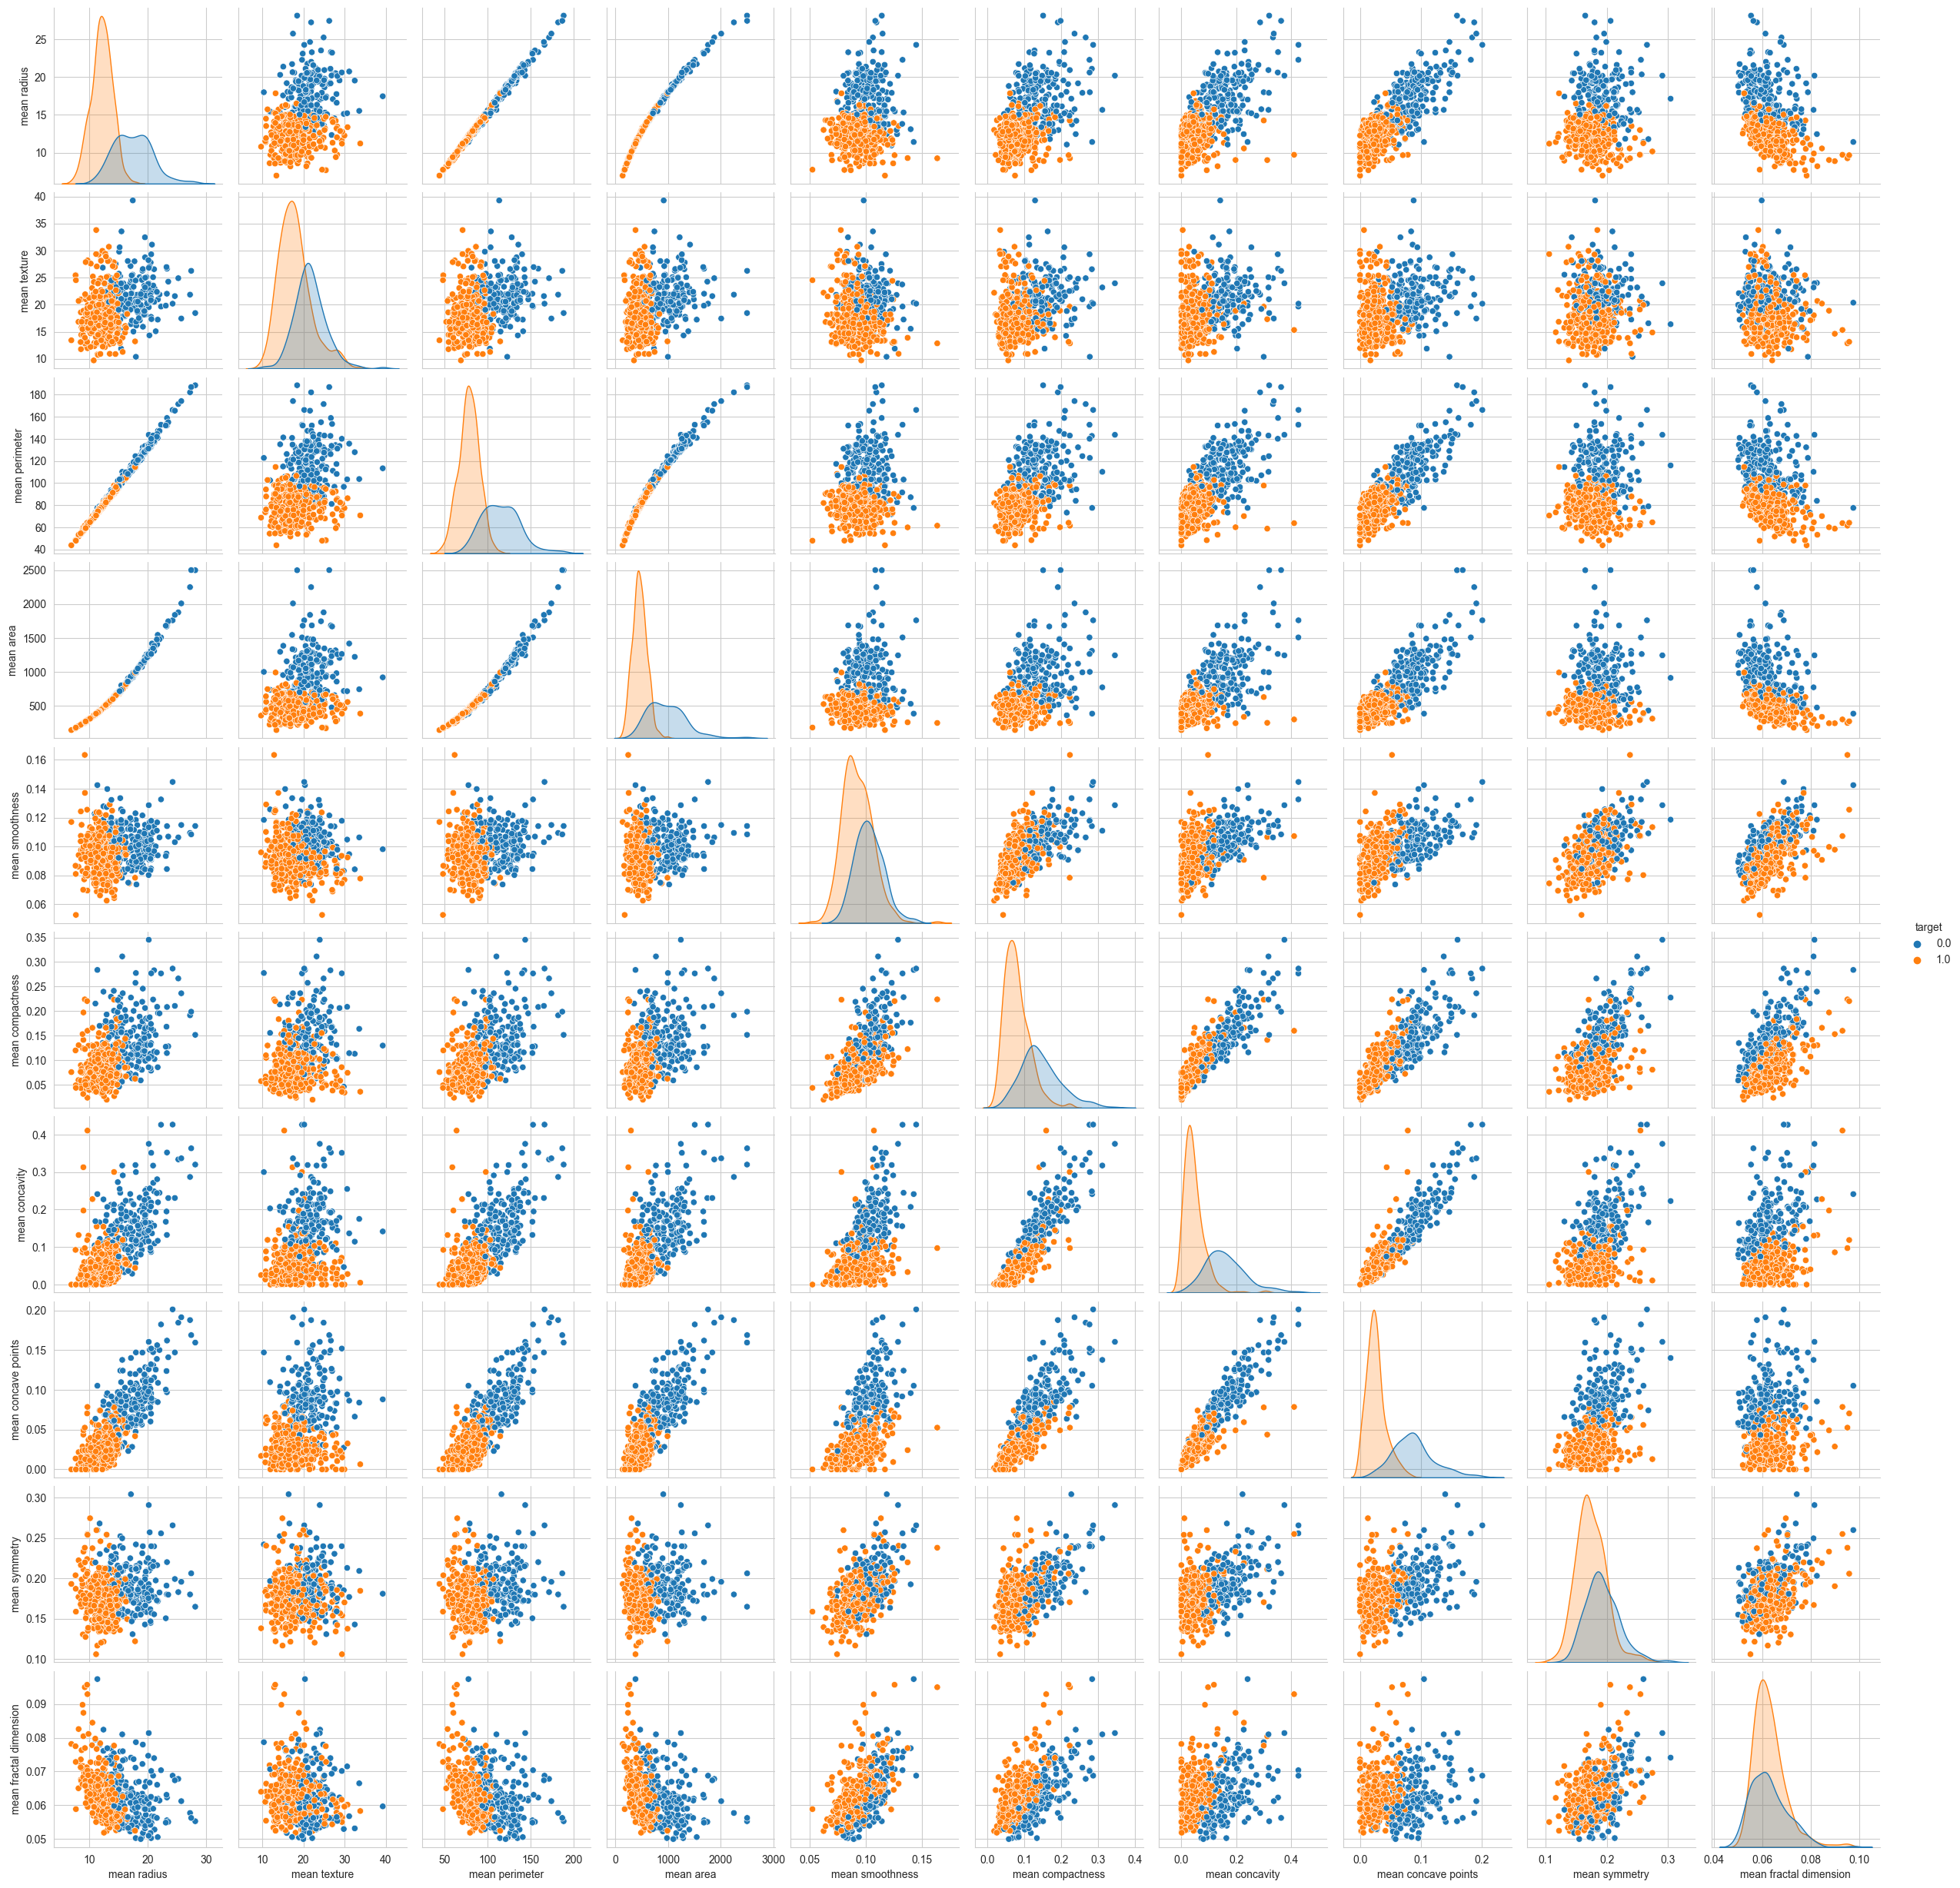

In [203]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension'])

<AxesSubplot: >

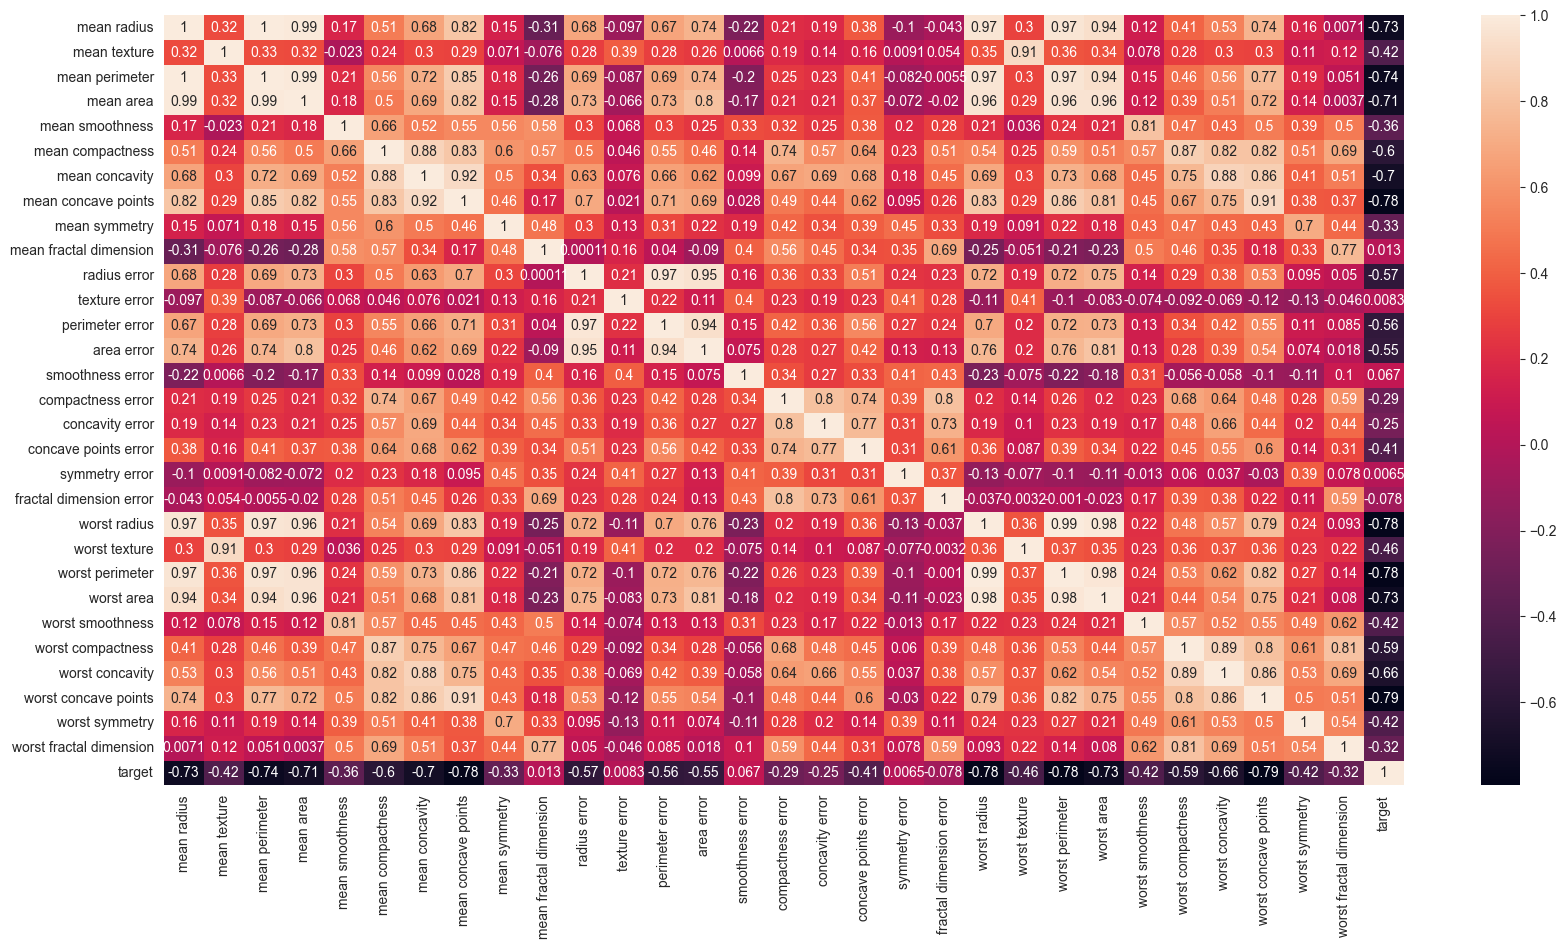

In [204]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

In [205]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('target', axis=1)
y = df.target

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (569, 30)
'y' shape: (569,)


In [206]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [207]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [208]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=3407)

In [209]:
lr_model.fit(X_train, y_train)

print_score(lr_model, X_train, y_train, X_test, y_test, train=True)
print_score(lr_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.74%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.993151    0.984127  0.987437    0.988639      0.987505
recall       0.973154    0.995984  0.987437    0.984569      0.987437
f1-score     0.983051    0.990020  0.987437    0.986535      0.987411
support    149.000000  249.000000  0.987437  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[145   4]
 [  1 248]]

Test Result:
Accuracy Score: 98.25%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.968750    0.990654  0.982456    0.979702      0.982584
recall      0.984127    0.981481  0.982456    0.982804      0.982456
f1-score    0.976378    0.986047  0.982456    0.981212      0.982484
support    63.000000  108.000000  0.982456  171.000000    171.00000

In [210]:
X_train.shape

(398, 30)

In [213]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



In [214]:
lr_model.fit(X_train, y_train)

print_score(lr_model, X_train, y_train, X_test, y_test, train=True)
print_score(lr_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.74%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.993151    0.984127  0.987437    0.988639      0.987505
recall       0.973154    0.995984  0.987437    0.984569      0.987437
f1-score     0.983051    0.990020  0.987437    0.986535      0.987411
support    149.000000  249.000000  0.987437  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[145   4]
 [  1 248]]

Test Result:
Accuracy Score: 98.25%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.968750    0.990654  0.982456    0.979702      0.982584
recall      0.984127    0.981481  0.982456    0.982804      0.982456
f1-score    0.976378    0.986047  0.982456    0.981212      0.982484
support    63.000000  108.000000  0.982456  171.000000    171.00000